Titanic Data set prediction using ML : 
the goal: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import itertools as I
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as sk
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import svm, datasets
# now you can import normally from model_selection
from sklearn.model_selection import GridSearchCV



# Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


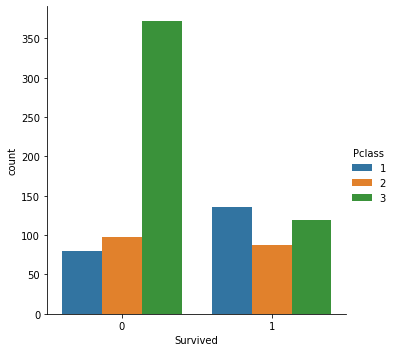

In [36]:
## checking of the class had any effect in the survival rate
sns.factorplot('Survived',data=titanic_df,kind='count',hue='Pclass')

In [29]:
titanic_df = pd.read_csv('train.csv', sep =',')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


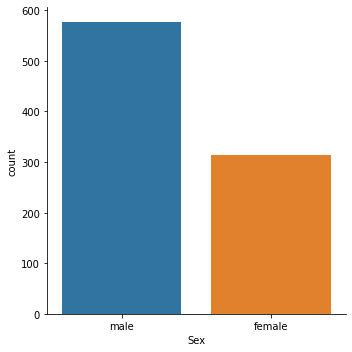

In [9]:
###Gender Plot
sns.factorplot('Sex',data=titanic_df,kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


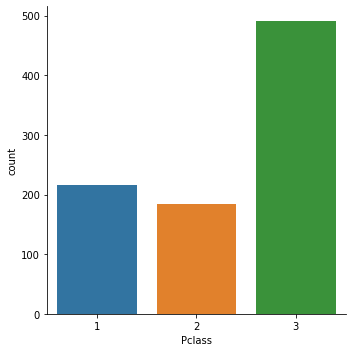

In [10]:
### Class plot
sns.factorplot('Pclass',data=titanic_df,kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


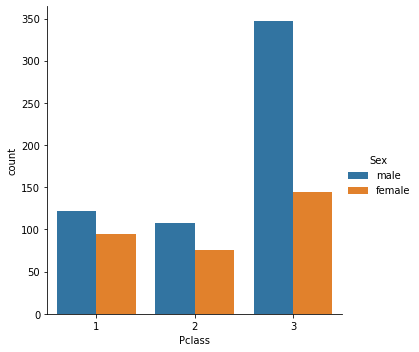

In [11]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

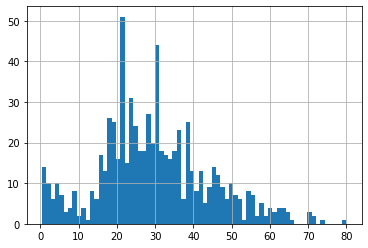

In [12]:
titanic_df['Age'].hist(bins=70)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


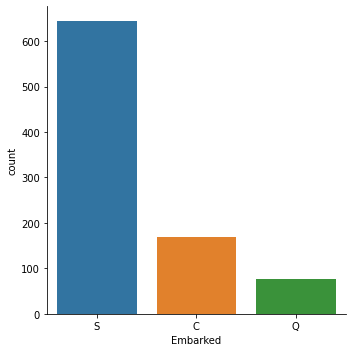

In [14]:
sns.factorplot('Embarked',data=titanic_df,kind='count')


Missing values and features

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#Function to count missing values on the dataset 
def missing_values_table(df):
    
    mis_val = df.isnull().sum()

    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)
    
    # Print some summary information
    print("Your selected dataframe has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(titanic_df)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [20]:
print(len(titanic_df['Cabin'].unique()))

148


## Data preprocessing

In [30]:
 titanic_df.drop('Cabin',axis=1,inplace=True)

In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [45]:
 titanic_df.drop('Name',axis=1,inplace=True)

In [46]:
titanic_df["Sex"].replace({"male":1,"female":0},inplace=True)

In [48]:
def func(ticket:str):
    try:
        return int(ticket.split(" ")[-1])
    except:
        return -1
titanic_df['Ticket'] = titanic_df['Ticket'].apply(func)

In [32]:
titanic_df['Age'].mean()

29.69911764705882

In [33]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [34]:
## Filling the null values in the Embarked column with S as there are more number of passengers boarded from Southhampton
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [35]:
## To check if there are still any null values in the dataset
titanic_df.isnull().values.any()

False

# Corrélations

In [37]:
df_correlations = titanic_df.corr()

In [41]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


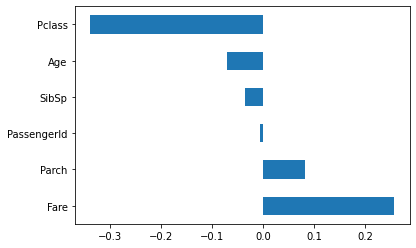

In [42]:
(df_correlations.Survived
 .drop('Survived')
 .sort_values(ascending=False)
     .plot
     .barh())

du coup la classe est corrélé négativement et le tarif payé par le passager est corrélé positivement ? 

# ML models

In [53]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(6)
memory usage: 57.8 KB


In [52]:
titanic_df[['Survived', 'Embarked']] = titanic_df[['Survived', 'Embarked']].astype('category')

In [54]:
 titanic_df.drop('PassengerId',axis=1,inplace=True)

In [66]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Ticket    891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 50.8 KB


In [73]:
titanic_df.columns[0]

'Survived'

In [74]:
for i in range(len(titanic_df.columns)):
  print('la colonne  {} a {} valeurs uniques'.format(titanic_df.columns[i], len(titanic_df[titanic_df.columns[i]].unique())))

la colonne  Survived a 2 valeurs uniques
la colonne  Pclass a 3 valeurs uniques
la colonne  Sex a 2 valeurs uniques
la colonne  Age a 89 valeurs uniques
la colonne  SibSp a 7 valeurs uniques
la colonne  Parch a 7 valeurs uniques
la colonne  Ticket a 679 valeurs uniques
la colonne  Fare a 248 valeurs uniques
la colonne  Embarked a 3 valeurs uniques


# LabelEncoder

In [75]:
categorical_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] #Labelencoding 

In [76]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [77]:
titanic_df =MultiColumnLabelEncoder(columns = categorical_cols).fit_transform(titanic_df)

# Decision tree

In [57]:
from sklearn.model_selection import cross_val_score

In [78]:
X = titanic_df.drop('Survived', axis =1)
y = titanic_df['Survived']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
tree_param = {
    "criterion": ['entropy', 'gini'],
    "max_depth": range(10, 16),
    "min_samples_leaf": range(5,9)
}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
#y_pred = clf.predict(X_test)

# Create cross validatpon & grid
cv_results = cross_validate(clf, X, y, cv=5)

grid = GridSearchCV(clf, param_grid=tree_param, cv=5, verbose=1, n_jobs=-1)

grid.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 16),
                         'min_samples_leaf': range(5, 9)},
             verbose=1)

In [81]:
print(pd.DataFrame(cv_results).mean())

print('best parameters:', grid.best_params_)

fit_time      0.005711
score_time    0.002271
test_score    0.775538
dtype: float64
best parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 5}


In [83]:
print('The best score result is', grid.best_score_)

The best score result is 0.8182223338145753


# Random Forest Classifier

In [86]:
rfc=RandomForestClassifier(random_state=42)

In [87]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [89]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [90]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 500}

In [91]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=7, criterion='gini')

In [93]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=500,
                       random_state=42)

In [94]:
pred=rfc1.predict(X_test)

In [96]:
print("Accuracy for Random Forest on our data: ",accuracy_score(y_test,pred))


Accuracy for Random Forest on our data:  0.8171641791044776


XGBOOST 

In [97]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [98]:
params={
 "learning_rate"    : [0.025] ,
 "max_depth"        : [15],
 "min_child_weight" : [5],
 "gamma"            : [0.1],
}

In [99]:
xgbclassifier=XGBClassifier()

In [100]:
randomseacrch=RandomizedSearchCV(xgbclassifier,param_distributions=params,n_iter=7,scoring='f1_weighted',n_jobs=-1,cv=5,verbose=3)


In [101]:
randomseacrch.fit(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=7. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=7, n_jobs=-1,
                   param_distributions={'gamma': [0.1],
                                        'learning_rate': [0.025],
                                        'max_depth': [15],
                                        'min_child_weight': [5]},
                   scoring='f1_weighted', verbose=3)

In [102]:
xgbclassifier=XGBClassifier(min_child_weight= 5, max_depth= 15, learning_rate= 0.025, gamma=0.1,booster='gbtree')

In [103]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbclassifier,X,y,cv=10)

In [104]:
print(score)

[0.74444444 0.82022472 0.7752809  0.87640449 0.88764045 0.83146067
 0.83146067 0.79775281 0.88764045 0.84269663]


In [105]:
print("Accuracy for Xgbclassifier  on our data: ",score.mean())

Accuracy for Xgbclassifier  on our data:  0.8295006242197254
